# Exercise 4: Mean Shift Algorithm for Face Recognition

This is an example of implementation of Mean-Shift algorithm for segmentation of images. The algorithms aims at recognizing faces (light pixels) from the background (darker pixels).
Mean-Shift algorithm determines the number of clusters and formes the clusters.

## 1. Developing Environment

In [1]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans, MeanShift

from sklearn import metrics
import matplotlib.pyplot as plt

# Python Imaging Library
from PIL import Image

from scipy.spatial.distance import cdist


## 2. Loading Data

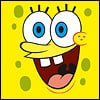

In [2]:
# Read the image file
OUR_IMAGE = '../images/spongebob.jpg'
#OUR_IMAGE = '../images/TechBBQ.jpg'
image = Image.open(OUR_IMAGE)
image

The algorithm expects the data stored into a data frame. Each pixel is presented by two coordinates and three colors in the RGB schema: red, green, and Blue, each measured with a value between 0 and 255.

In [3]:
image.size

(100, 100)

In [4]:
# Convert image pixels to numpy array
pix_array = np.array(image)
pix_array

array([[[  8,   4,   0],
        [ 50,  43,   0],
        [ 21,   8,   0],
        ...,
        [ 25,   6,   0],
        [ 61,  49,   0],
        [ 13,   4,   0]],

       [[ 39,  34,   0],
        [209, 202, 112],
        [234, 221,  91],
        ...,
        [223, 208,  81],
        [214, 204, 115],
        [ 37,  30,   0]],

       [[ 18,  12,   0],
        [236, 227,  96],
        [255, 246,  71],
        ...,
        [255, 247,  79],
        [236, 230, 106],
        [ 20,  17,   0]],

       ...,

       [[ 24,   7,   0],
        [228, 213,  84],
        [255, 245,  73],
        ...,
        [255, 244,  68],
        [237, 227, 104],
        [ 24,  14,   0]],

       [[ 57,  43,   0],
        [214, 202, 116],
        [233, 224,  97],
        ...,
        [241, 228,  88],
        [212, 201, 109],
        [ 40,  30,   0]],

       [[ 13,   2,   0],
        [ 45,  36,   0],
        [ 23,  16,   0],
        ...,
        [ 30,  16,   0],
        [ 42,  31,   0],
        [ 14,   3,   0]]

In [5]:
# For test, get the values of pixel[0][0]
pix_array[10][20]

array([159, 176,  20], dtype=uint8)

In [6]:
# Alternativ way to get the pixel color values
pixels = image.load()
pixels[20,10]

(159, 176, 20)

In [7]:
# Convert the pixels into pandas dataframe, add the coordinates and the RGB values together
df = pd.DataFrame(
    [[x, y, pixels[x, y][0], pixels[x, y][1], pixels[x, y][2]]
        for x in range(image.size[0])
        for y in range(image.size[1])
     ],
    columns=['x', 'y', 'r', 'g', 'b']
)

In [8]:
df.head()

,x,y,r,g,b
0,0,0,8,4,0
1,0,1,39,34,0
2,0,2,18,12,0
3,0,3,20,12,0
4,0,4,26,20,0


## 3. Training a Model

In [9]:
# Train mean-shift model with the data frame
imageModel = MeanShift()
imageModel.fit(df)

MeanShift()

In [10]:
# See the clusters and cluster centres
imageModel.cluster_centers_

array([[ 47.64707674,  52.60277101, 241.33663216, 229.14083435,
         21.73797199],
       [ 53.26693227,  33.83494593, 245.80364257, 241.38019351,
        208.8104724 ],
       [ 53.85417867,  52.3832853 ,  62.00864553,  31.49798271,
         13.55446686]])

In [11]:
len(imageModel.cluster_centers_)

3

In [12]:
len(imageModel.labels_)

10000

In [13]:
# Create a function to iterate through the data and create clusters
# Remember the variables cluster_centers_ and labels_ from last time?
def image_clusters(model, output, MY_IMAGE):
    # for each cluster
    for i in range(len(model.cluster_centers_)):
        image = Image.open(MY_IMAGE)
        pixels = image.load()
        # for each pixel
        for j in range(len(df)):
            if (model.labels_[j] != i):
                # make the rest white
                pixels[int(df['x'][j]), int(df['y'][j])] = (255, 255, 255)
        image.save(output + str(i) + '.jpg')

In [14]:
image_clusters(imageModel, 'meanshift_cluster', OUR_IMAGE)

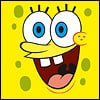

In [15]:
image

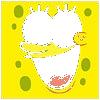

In [16]:
clustered_image0 = Image.open('meanshift_cluster0.jpg')
clustered_image0

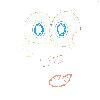

In [17]:
clustered_image1 = Image.open('meanshift_cluster1.jpg')
clustered_image1

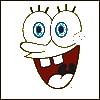

In [18]:
clustered_image2 = Image.open('meanshift_cluster2.jpg')
clustered_image2

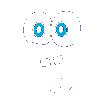

In [19]:
clustered_image3 = Image.open('meanshift_cluster3.jpg')
clustered_image3

## 4. Validating the Model with K-Means

In [20]:
# Determine k by minimizing the distortion - 
# the sum of the squared distances between each observation vector and its centroid
distortions = []
K = range(2,10)
for k in K:
    model = KMeans(n_clusters=k).fit(df)
    model.fit(df)
    distortions.append(sum(np.min(cdist(df, model.cluster_centers_, 'euclidean'), axis=1)) / df.shape[0]) 
print("Distortion: ", distortions)

Distortion:  [90.34278563768095, 62.21699977217902, 55.894146321383445, 52.53516671467088, 46.22152325676372, 42.05418565747383, 39.62482943586733, 37.56025466677585]


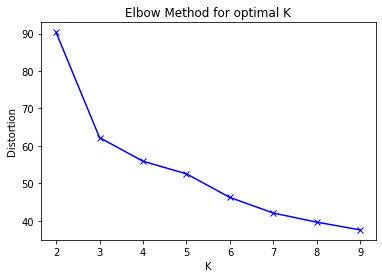

In [32]:
# Plot the elbow
plt.title('Elbow Method for optimal K')
plt.plot(K, distortions, 'bx-')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.show()

In [33]:
# K-means model fitting with specified number of clusters
k_means_model = KMeans(n_clusters=7)
k_means_model.fit(df)

KMeans(n_clusters=7)

In [34]:
# Create image clusters
image_clusters(k_means_model, 'kmeans_cluster', OUR_IMAGE)

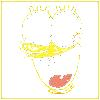

In [35]:
clustered_image0 = Image.open('kmeans_cluster0.jpg')
clustered_image0

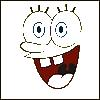

In [36]:
clustered_image1 = Image.open('kmeans_cluster1.jpg')
clustered_image1

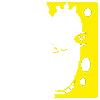

In [37]:
clustered_image2 = Image.open('kmeans_cluster2.jpg')
clustered_image2

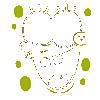

In [38]:
clustered_image3 = Image.open('kmeans_cluster3.jpg')
clustered_image3

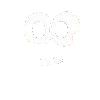

In [39]:
clustered_image4 = Image.open('kmeans_cluster4.jpg')
clustered_image4

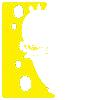

In [40]:
clustered_image5 = Image.open('kmeans_cluster5.jpg')
clustered_image5

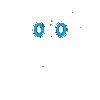

In [41]:
clustered_image6 = Image.open('kmeans_cluster6.jpg')
clustered_image6